In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_forecast_component
from plotnine import *

# Data Loading

In [10]:
df=pd.read_csv('/home/ubuntu/code/prophet/examples/example_air_passengers.csv')
print(df.shape)
df.ds=pd.to_datetime(df.ds,format='%Y-%m-%d')
df.head(10)

(144, 2)


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


/home/ubuntu/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


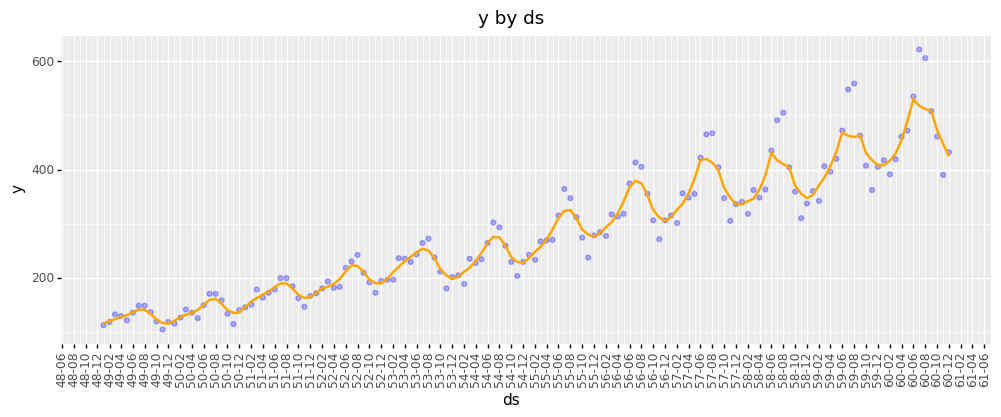

<ggplot: (8763936215610)>


In [23]:
## Viz
print(
    ggplot(df,aes('ds','y'))
    +geom_point(color='blue',alpha=0.3)
    +geom_smooth(span=0.05,color='orange',alpha=0.5)
    +scale_x_datetime(date_labels='%y-%m',date_breaks='2 month')
    +theme(axis_text_x=element_text(angle=90),figure_size=(12,4))
    +labs(title='y by ds')

)

# Processing 

## 01 Default Model 

### 01.1 Fitting 

In [5]:
m=Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 01.2 Forecasting 

In [17]:
future=m.make_future_dataframe(50,freq='MS')
print(future.shape)

(194, 1)


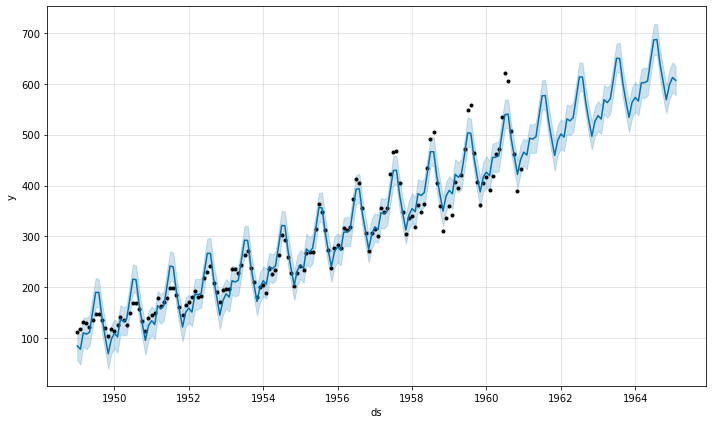

In [25]:
forecast=m.predict(future)
fig=m.plot(forecast)
# seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend

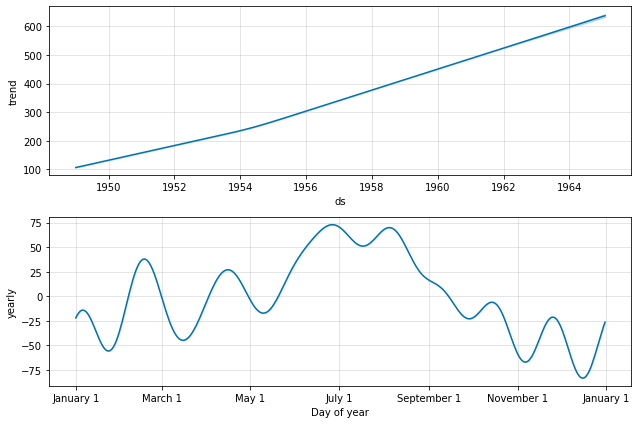

In [29]:
## Components
fig_compo=m.plot_components(forecast)

## 02 Multiplicative Seasonality

### 02.1 Fitting 

In [26]:
m_multi=Prophet(seasonality_mode='multiplicative')
m_multi.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 02.2 Forecasting 

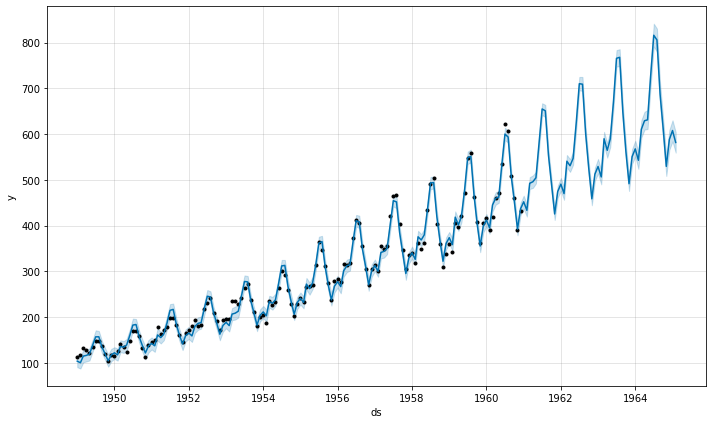

In [27]:
forecast_multi=m_multi.predict(future)
fig_multi=m_multi.plot(forecast_multi)

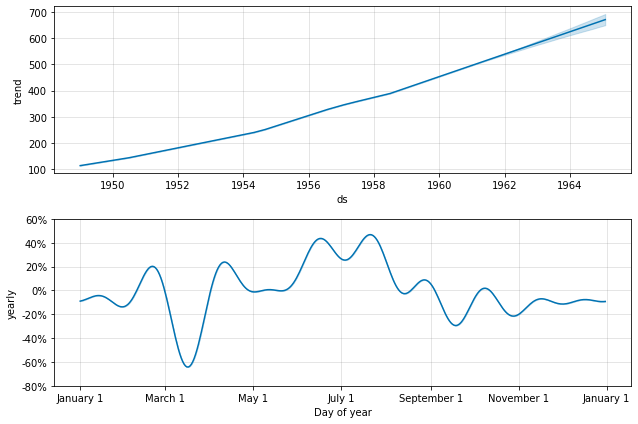

In [28]:
## Components
fig_compo_multi=m_multi.plot_components(forecast_multi)